# Project Description
Dataset: 167 Parameters from Astronomy LSST Project Pipeline DMSTACK.

Objective: Estimate whether the galaxy object is a parent or child using dmstack parameters.

Problem type: Classification


# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED=100
np.random.seed(SEED)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.options.display.float_format = '{:,.5f}'.format # df.A.value_counts().astype(float)
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.2')]


In [2]:
%%capture
# capture will not print in notebook

import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## mount google drive
    from google.colab import drive
    drive.mount('/content/drive')
    dat_dir = 'drive/My Drive/Colab Notebooks/data/'
    sys.path.append(dat_dir)

    # Also install my custom module
    module_dir = 'drive/My Drive/Colab Notebooks/Bhishan_Modules/' 
    sys.path.append(module_dir)
    !cd drive/My Drive/Colab Notebooks/Bhishan_Modules/
    !pip install -e bhishan
    !cd -

    # pip install
    #!pip install pyldavis
    !pip install hyperopt
    !pip install catboost
    !pip install shap
    !pip install eli5
    !pip install lime
    #!pip install category_encoders # TargetEncoder
    #!pip install optuna # hyper param opt

    # faster pandas
    # df['x'].swifter.apply(myfunc)
    # df[['x','y']].swifter.apply(myfunc,pos_arg,keyword_arg=mykeyword_arg)
    # !pip install swifter
    
    # update modules
    !pip install -U scikit-learn

    # Note: We need to restart kernel to use tqdm
    # from tqdm.notebook import trange, tqdm
    # tqdm.pandas()
    # out = df['A'].progress_apply(myfunc)
    # !pip install -U tqdm

    # print
    print('Environment: Google Colaboratory.')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


In [3]:
import scipy
import sklearn

print([(x.__name__,x.__version__) for x in [scipy, sklearn]])

[('scipy', '1.3.3'), ('sklearn', '0.22')]


In [0]:
# six and pickle
import six
import pickle
import joblib

In [0]:
# scale and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [0]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [0]:
# metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [0]:
# cross validation
from sklearn.model_selection import KFold # for regression
from sklearn.model_selection import StratifiedKFold # for classification

#-----------------------------------------------------------------------
# scoring clf: accuracy, balanced_accuracy, average_precision
#              f1, f1_micro, f1_macro, f1_weighted, f1_samples
#              precision, recall, f1, roc_auc
#              roc_auc_ovr, roc_auc_ovo # _weighted
#
# scoring reg: neg_mean_squared_error, neg_mean_absolute_error
#              neg_root_mean_squared_error, 
#              neg_mean_squared_log_error
#              neg_median_absolute_error
#
# cross_val_score(lasso, X, y, cv=5,n_jobs=-1,scoring='r2')
# cross_val_score(clf,   X, y, cv=5,n_jobs=-1,scoring='recall')
from sklearn.model_selection import cross_val_score

#----------------------------------------------------------------------
# cross_val_predict may differ from cross_validate and cross_val_score
# cross_val_predict can be used for plotting.
# ypreds = cross_val_predict(lasso, X, y, cv=5,n_jobs=-1,scoring='r2')
# ypreds = cross_val_predict(clf,   X, y, cv=5,n_jobs=-1,scoring='recall')
from sklearn.model_selection import cross_val_predict

#-----------------------------------------------------------------------
# cv_results = cross_validate(lasso, X, y, cv=5,n_jobs=-1,scoring='r2')
# print(cv_results['test_score'])
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [0]:
# sklearn scalar metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [0]:
# multiple metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

In [0]:
# roc auc and curves
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [0]:
# confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F1':[],
                        'AUC':[],
                    })

In [0]:
import xgboost as xgb

In [0]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Useful Scripts

In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

# Load the Data

In [18]:
ifile = dat_dir + '/flux/processed_0.h5'
df = pd.read_hdf(ifile,key='processed')
print(df.shape)
display(df.info(verbose=False, memory_usage="deep"))

df.head()

(6830, 47)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6830 entries, 6 to 7572
Columns: 47 entries, # calib_detected to base_ClassificationExtendedness_value
dtypes: float32(35), int8(12)
memory usage: 1.0 MB


None

,# calib_detected,deblend_deblendedAsPsf,deblend_tooManyPeaks,deblend_rampedTemplate,base_SdssShape_flag,base_SdssShape_flag_shift,ext_shapeHSM_HsmShapeRegauss_flag,ext_shapeHSM_HsmShapeRegauss_flag_parent_source,ext_shapeHSM_HsmShapeRegauss_flag_galsim,base_PixelFlags_flag_edge,base_Variance_flag,base_Variance_flag_emptyFootprint,coord_ra,coord_dec,parent,deblend_nChild,base_GaussianCentroid_x,base_GaussianCentroid_y,base_NaiveCentroid_x,base_NaiveCentroid_y,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xSigma,base_SdssCentroid_ySigma,base_SdssShape_xx,base_SdssShape_yy,base_SdssShape_xy,base_SdssShape_xxSigma,base_SdssShape_yySigma,base_SdssShape_xySigma,base_SdssShape_x,base_SdssShape_y,base_SdssShape_psf_xx,base_SdssShape_psf_yy,base_SdssShape_psf_xy,ext_shapeHSM_HsmPsfMoments_x,ext_shapeHSM_HsmPsfMoments_y,ext_shapeHSM_HsmPsfMoments_xx,ext_shapeHSM_HsmPsfMoments_yy,ext_shapeHSM_HsmPsfMoments_xy,ext_shapeHSM_HsmSourceMoments_x,ext_shapeHSM_HsmSourceMoments_y,ext_shapeHSM_HsmSourceMoments_xx,ext_shapeHSM_HsmSourceMoments_yy,ext_shapeHSM_HsmSourceMoments_xy,base_GaussianFlux_flux,base_ClassificationExtendedness_value
6,0,0,1,0,0,0,1,1,0,1,0,0,0.00190,0.00000,0.00000,3.00000,"1,671.94788",28.21710,"1,671.06567",27.98990,"1,671.93860",28.14400,0.08690,0.08770,11.42790,11.29140,0.89270,0.48970,0.34530,0.48390,"1,671.94165",28.17150,12.17320,12.25470,0.77620,-0.00020,-0.00020,12.17900,12.26040,0.77610,"1,678.82935",21.18940,138.00020,124.21060,-112.09300,"8,817.92578",1.00000
7,0,0,1,0,0,0,1,1,0,1,0,0,0.00180,0.00000,0.00000,2.00000,"1,782.08545",32.91540,"1,782.01184",32.06270,"1,782.11963",32.81840,0.08670,0.09010,11.54210,12.42220,-0.16860,0.50020,0.36700,0.53830,"1,782.11768",32.83840,12.17760,12.24830,0.78020,-0.00020,-0.00020,12.18330,12.25390,0.78000,"1,784.59436",28.03740,31.74550,84.89840,-34.87390,"7,491.68115",1.00000
14,0,0,1,0,0,0,1,1,0,1,0,0,0.00060,0.00010,0.00000,3.00000,"2,952.80908",53.15800,"2,952.04956",53.00670,"2,952.82861",53.12920,0.04420,0.04250,12.85160,11.76920,0.52140,0.26390,0.17870,0.24160,"2,952.81958",53.14020,11.97680,11.97660,0.79270,-0.00000,0.00010,11.98300,11.98260,0.79300,"2,958.09326",45.07320,69.85030,140.94479,-81.05060,"18,482.12695",1.00000
16,0,0,1,0,0,0,1,1,0,1,0,0,0.00250,0.00000,0.00000,3.00000,989.68817,26.52890,989.02551,26.02550,989.90411,26.55640,0.05510,0.04490,75.09270,15.56080,13.81760,1.53980,0.53460,0.31910,991.84790,26.87100,12.03340,12.24070,0.74760,-0.00020,-0.00020,12.03960,12.24610,0.74770,993.56732,27.14240,72.79850,14.63950,12.47790,"14,024.15723",1.00000
21,0,0,0,0,0,0,1,0,1,1,0,0,0.00100,0.00000,0.00000,0.00000,"2,529.72803",22.63060,"2,529.06274",22.03700,"2,529.73438",22.62840,0.07120,0.07110,10.85840,10.89100,0.86160,0.38860,0.27610,0.38980,"2,529.73267",22.62980,12.11690,12.09870,0.78980,-0.00010,-0.00010,12.12330,12.10490,0.79010,"2,529.73120",22.63130,10.86620,10.90070,0.86280,"4,823.80078",0.00000


In [19]:
df.columns.to_numpy()

array(['# calib_detected', 'deblend_deblendedAsPsf',
       'deblend_tooManyPeaks', 'deblend_rampedTemplate',
       'base_SdssShape_flag', 'base_SdssShape_flag_shift',
       'ext_shapeHSM_HsmShapeRegauss_flag',
       'ext_shapeHSM_HsmShapeRegauss_flag_parent_source',
       'ext_shapeHSM_HsmShapeRegauss_flag_galsim',
       'base_PixelFlags_flag_edge', 'base_Variance_flag',
       'base_Variance_flag_emptyFootprint', 'coord_ra', 'coord_dec',
       'parent', 'deblend_nChild', 'base_GaussianCentroid_x',
       'base_GaussianCentroid_y', 'base_NaiveCentroid_x',
       'base_NaiveCentroid_y', 'base_SdssCentroid_x',
       'base_SdssCentroid_y', 'base_SdssCentroid_xSigma',
       'base_SdssCentroid_ySigma', 'base_SdssShape_xx',
       'base_SdssShape_yy', 'base_SdssShape_xy', 'base_SdssShape_xxSigma',
       'base_SdssShape_yySigma', 'base_SdssShape_xySigma',
       'base_SdssShape_x', 'base_SdssShape_y', 'base_SdssShape_psf_xx',
       'base_SdssShape_psf_yy', 'base_SdssShape_psf_xy',


# Target Distribution

In [20]:
base = 'base_GaussianFlux_flux'
target = 'high_flux'


df[target] = df[base] > 5000
df.drop(base,axis=1,inplace=True)
df[target].value_counts()

True     4076
False    2754
Name: high_flux, dtype: int64

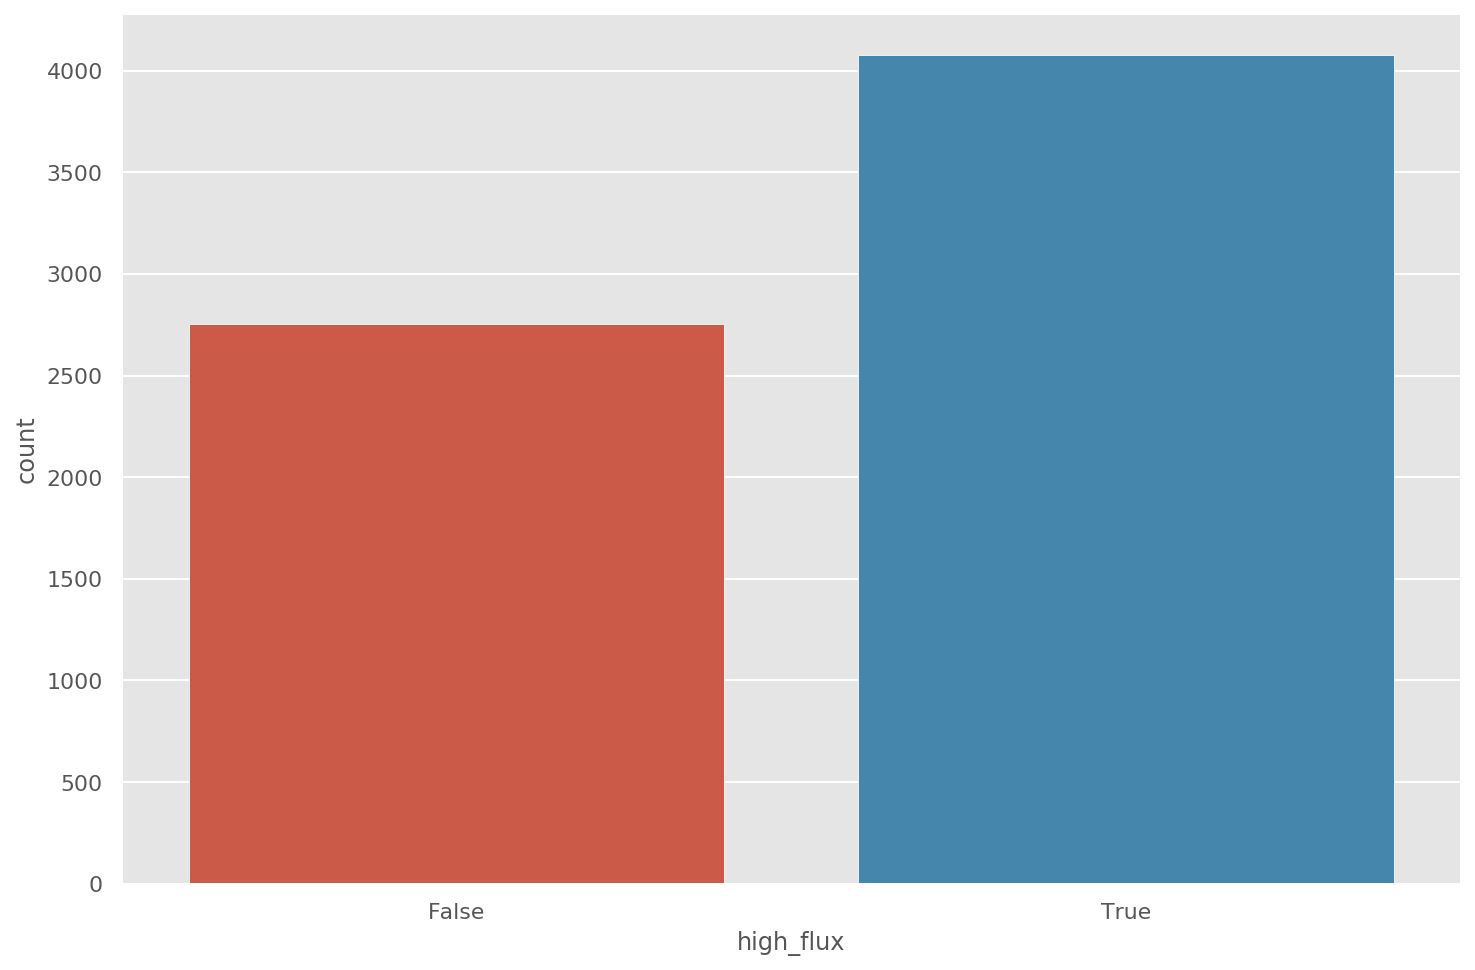

In [21]:
sns.countplot(df[target])

# Train-Test split

In [24]:
from sklearn.model_selection import train_test_split

Xtrain_orig, Xtest, ytrain_orig, ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

df_Xtrain_orig = pd.DataFrame(Xtrain_orig, columns=df.columns.drop(target))
df_Xtest = pd.DataFrame(Xtest, columns=df.columns.drop(target))

print(df_Xtrain_orig.shape)
df_Xtrain_orig.head()

(5464, 46)


,# calib_detected,deblend_deblendedAsPsf,deblend_tooManyPeaks,deblend_rampedTemplate,base_SdssShape_flag,base_SdssShape_flag_shift,ext_shapeHSM_HsmShapeRegauss_flag,ext_shapeHSM_HsmShapeRegauss_flag_parent_source,ext_shapeHSM_HsmShapeRegauss_flag_galsim,base_PixelFlags_flag_edge,base_Variance_flag,base_Variance_flag_emptyFootprint,coord_ra,coord_dec,parent,deblend_nChild,base_GaussianCentroid_x,base_GaussianCentroid_y,base_NaiveCentroid_x,base_NaiveCentroid_y,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xSigma,base_SdssCentroid_ySigma,base_SdssShape_xx,base_SdssShape_yy,base_SdssShape_xy,base_SdssShape_xxSigma,base_SdssShape_yySigma,base_SdssShape_xySigma,base_SdssShape_x,base_SdssShape_y,base_SdssShape_psf_xx,base_SdssShape_psf_yy,base_SdssShape_psf_xy,ext_shapeHSM_HsmPsfMoments_x,ext_shapeHSM_HsmPsfMoments_y,ext_shapeHSM_HsmPsfMoments_xx,ext_shapeHSM_HsmPsfMoments_yy,ext_shapeHSM_HsmPsfMoments_xy,ext_shapeHSM_HsmSourceMoments_x,ext_shapeHSM_HsmSourceMoments_y,ext_shapeHSM_HsmSourceMoments_xx,ext_shapeHSM_HsmSourceMoments_yy,ext_shapeHSM_HsmSourceMoments_xy,base_ClassificationExtendedness_value
6481,0,0,0,0,0,0,1,0,1,0,0,0,0.00230,0.00260,"1,980.00000",0.00000,"1,231.70020","2,678.12646","1,231.06262","2,678.02710","1,231.68250","2,678.11084",0.16580,0.17990,10.36920,11.40470,0.67780,0.88590,0.65830,0.97440,"1,231.68799","2,678.11548",11.63730,12.07280,1.06220,-0.00030,-0.00000,11.64300,12.07950,1.06250,"1,231.71179","2,678.12646",9.97670,11.39490,0.61910,0.00000
62,0,0,0,0,0,0,0,0,0,0,0,0,0.00290,0.00010,0.00000,0.00000,612.25293,61.59480,612.02948,60.97070,612.28479,61.58060,0.35720,0.30160,20.44580,16.35780,1.26700,1.67860,1.06420,1.34300,612.25830,61.58460,11.86420,12.19740,0.73270,-0.00020,-0.00010,11.87020,12.20280,0.73280,612.23560,61.58370,20.08630,16.22850,1.12670,1.00000
2843,1,0,0,0,0,0,0,0,0,0,1,1,0.00330,0.00030,224.00000,0.00000,197.64330,290.55121,197.03700,290.03601,197.63780,290.55981,0.00510,0.00570,12.62300,15.09750,-1.66930,0.03070,0.02390,0.03670,197.64470,290.54681,11.50940,12.16800,0.74740,-0.00030,0.00010,11.51490,12.17360,0.74750,197.65170,290.53381,12.63460,15.11650,-1.67440,1.00000
6414,0,0,0,0,0,0,0,0,0,0,1,1,0.00330,0.00260,"1,941.00000",0.00000,230.51910,"2,688.60498",230.03250,"2,688.03052",230.52040,"2,688.60864",0.00570,0.00650,12.19410,14.91130,0.31460,0.03370,0.02630,0.04120,230.52161,"2,688.60449",11.10860,11.67210,1.04140,-0.00030,0.00050,11.11410,11.67790,1.04120,230.52290,"2,688.60010",12.20200,14.92060,0.31410,1.00000
5297,0,1,0,0,0,0,1,0,1,0,0,0,0.00250,0.00190,"1,450.00000",0.00000,"1,060.36121","1,974.85815","1,060.04272","1,974.04346","1,060.36035","1,974.83911",0.11720,0.14100,10.06360,13.65500,-0.22430,0.62850,0.51780,0.85280,"1,060.35901","1,974.84253",11.46860,12.37570,1.01040,-0.00060,-0.00010,11.47390,12.38090,1.01060,"1,060.35706","1,974.84595",10.07060,13.66880,-0.22410,0.00000


# Train Validation Split

In [25]:
from sklearn.model_selection import train_test_split

Xtrain, Xvalid, ytrain, yvalid = train_test_split(
    Xtrain_orig, 
    ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ytrain_orig)

df_Xtrain = pd.DataFrame(Xtrain, columns=df.columns.drop(target))
df_Xvalid = pd.DataFrame(Xvalid, columns=df.columns.drop(target))

print(df_Xtrain.shape)

(4371, 46)


# Modelling

## Logistic Regression

In [26]:
model = xgb.XGBClassifier()
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Time taken: 0 min 1 secs


,Model,Description,Accuracy,Precision,Recall,F1,AUC
0,Xgboost,"default, imbalanced",0.98536,0.98536,0.98536,0.98536,0.98538
1,Xgboost,"default, imbalanced",0.98170,0.98170,0.98170,0.98170,0.98143
2,Xgboost,"default,",0.98170,0.98170,0.98170,0.98170,0.98143
3,Xgboost,default,0.98536,0.98536,0.98536,0.98536,0.98538


[[543   8]
 [ 12 803]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       551
        True       0.99      0.99      0.99       815

    accuracy                           0.99      1366
   macro avg       0.98      0.99      0.98      1366
weighted avg       0.99      0.99      0.99      1366



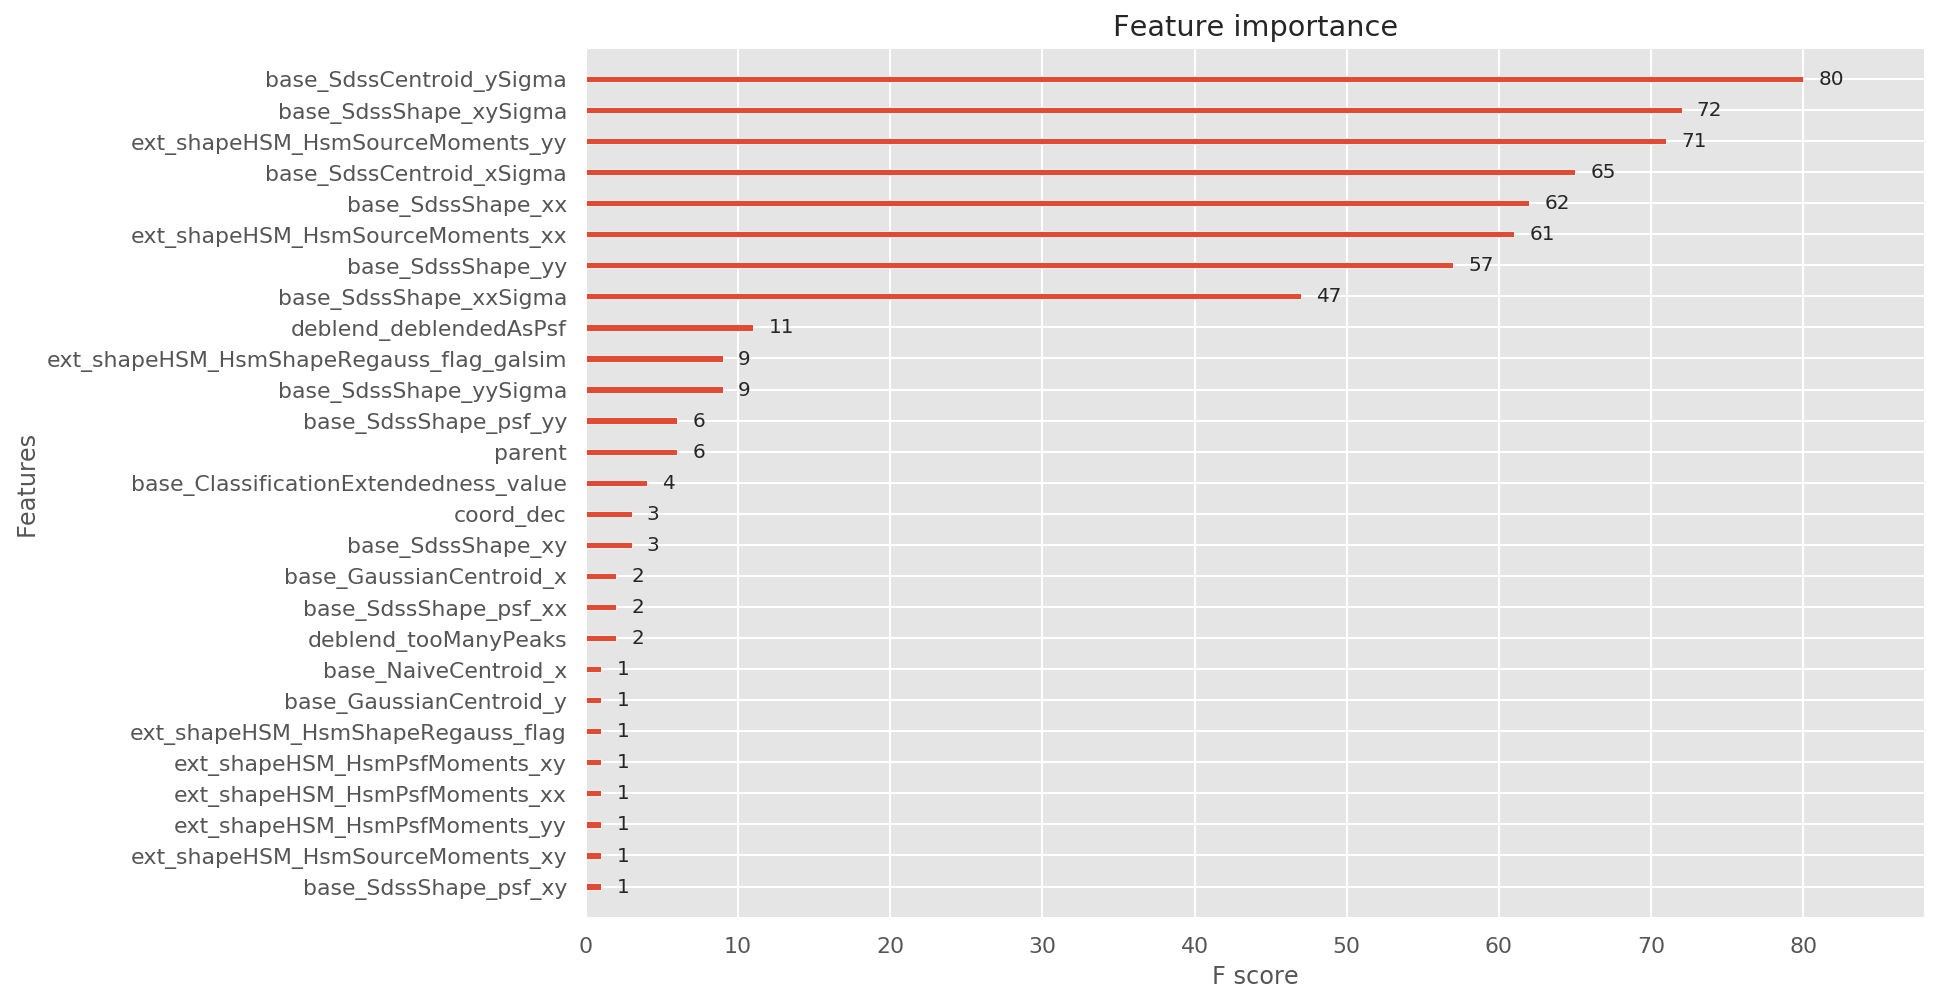

In [37]:
time_start = time.time()

# model
model = xgb.XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')

# fitting
model.fit(Xtrain,ytrain)

# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(model, Xtest, ytest, cv=skf)
ypreds = ypreds_cv

# model evaluation
row_eval = ['Xgboost','default', 
            accuracy_score(ytest, ypreds),
            precision_score(ytest, ypreds, average='micro'),
            recall_score(ytest, ypreds, average='micro'),
            f1_score(ytest, ypreds, average='micro'),
            roc_auc_score(ytest, ypreds),
       ]


df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytest, ypreds))
print(classification_report(ytest,ypreds))

# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model,ax=ax)
plt.show()

# HPO (Hyper Parameter Optimization)
**Important Parameters:**

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.


**Regularization parameters:**

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.


In [0]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

def hpo_hyperopt(param_space, Xtrain, ytrain, Xtest, ytest, num_eval,cv=3):
    """HPO using hyperopt package.

    Hyper Parameter Optimation using Bayesian methods.

    Usage:
    -------
    num_eval = 500 # number of evaluations
    param_hyperopt = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 1000, 50)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    }


    trials, dict_best_params1 = hpo_hyperopt(param_hyperopt,
                                Xtrain_under, ytrain_under,
                                Xtest_under, ytest_under, num_eval)

    clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        **dict_best_params1)

    """
    # time
    time_start = time.time()
    
    # define objective function
    def objective_function(params):
        model = xgb.XGBClassifier(**params)
        score = cross_val_score(model, Xtrain, ytrain, cv=cv).mean()
        return {'loss': -score, 'status': STATUS_OK}

    # keep track of trials
    trials = Trials()

    # best params
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=num_eval, 
                      trials=trials,
                      rstate= np.random.RandomState(SEED))
    
    # dict best params
    dict_best_params = copy.copy(best_param)

    if 'boosting_type' in dict_best_params: 
        dict_best_params['boosting_type'] = 'gbdt' if dict_best_params['boosting_type'] == 0 else 'dart'


    int_params = ['max_depth','num_leaves','n_estimators']

    for int_param in int_params:
        # make integer if exist
        if int_param in dict_best_params:
            dict_best_params[int_param] = int(dict_best_params[int_param])
    
    # loss
    loss = [x['result']['loss'] for x in trials.trials]

    # best model    
    model_best = xgb.XGBClassifier(**dict_best_params)                      
    model_best.fit(Xtrain, ytrain)

    time_taken = time.time() - time_start
    
    print("\nResults\n" + '='*50)
    print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
    print("Number of parameter combinations tested: ", num_eval)
    print("Train Score Best                       : {:.4f} ".format(min(loss)*-1))
    print("Test Score                             : {:.4f} ".format(model_best.score(Xtest, ytest)))
    print("Best parameters:")
    pp.pprint(dict_best_params)
    
    return trials, dict_best_params

In [42]:
from xgboost import XGBClassifier


num_eval = 50 # number of evaluations
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 1000, 50)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'subsample': hp.uniform ('subsample', 0.7, 1),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    # regularization
    # 'reg_alpha': hp.uniform('reg_alpha', 0.0, 0.1),
    # 'reg_lambda': hp.uniform('reg_lambda', 0.0, 0.1),
    # 'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
}


trials, dict_best_params = hpo_hyperopt(param_hyperopt, 
                                Xtrain, ytrain,
                                Xtest, ytest, num_eval)

# override best params
# dict_best_params['boosting_type'] = 'gbdt'
time_start = time.time()
# model fit
clf_xgb = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        **dict_best_params)

print(clf_xgb)
clf_xgb.fit(df_Xtrain, ytrain)


# predictions
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
ypreds_cv = cross_val_predict(clf_xgb, Xtest, ytest, cv=skf)
ypreds_under = ypreds_cv

# model evaluation
row_eval = ['Xgboost','hyperopt', 
            accuracy_score(ytest, ypreds),
            precision_score(ytest, ypreds, average='micro'),
            recall_score(ytest, ypreds, average='micro'),
            f1_score(ytest, ypreds, average='micro'),
            roc_auc_score(ytest, ypreds),
       ]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
display(df_eval)

# confusion matrix
print(confusion_matrix(ytest, ypreds))
print(classification_report(ytest,ypreds))

100%|██████████| 50/50 [06:10<00:00,  9.38s/it, best loss: -0.9869595058339052]

Results
Time taken: 6 min 17 secs
Number of parameter combinations tested:  50
Train Score Best                       : 0.9870 
Test Score                             : 0.9905 
Best parameters:
{   'boosting_type': 'dart',
    'colsample_by_tree': 0.7892457062166172,
    'learning_rate': 0.09254640867987562,
    'max_depth': 12,
    'min_child_weight': 2.0,
    'n_estimators': 550,
    'num_leaves': 48,
    'subsample': 0.9996773011187257,
    'x_gamma': 0.38644861291345534}
XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='dart',
              colsample_by_tree=0.7892457062166172, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.09254640867987562, max_delta_step=0, max_depth=12,
              min_child_weight=2.0, missing=None, n_estimators=550, n_jobs=-1,
              nthread=None, num_leaves=48, objective='binary:logistic',
 

,Model,Description,Accuracy,Precision,Recall,F1,AUC
0,Xgboost,"default, imbalanced",0.98536,0.98536,0.98536,0.98536,0.98538
1,Xgboost,"default, imbalanced",0.98170,0.98170,0.98170,0.98170,0.98143
2,Xgboost,"default,",0.98170,0.98170,0.98170,0.98170,0.98143
3,Xgboost,default,0.98536,0.98536,0.98536,0.98536,0.98538
4,Xgboost,hyperopt,0.98536,0.98536,0.98536,0.98536,0.98538


[[543   8]
 [ 12 803]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       551
        True       0.99      0.99      0.99       815

    accuracy                           0.99      1366
   macro avg       0.98      0.99      0.98      1366
weighted avg       0.99      0.99      0.99      1366

